In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import functools
import numpy as np
import pvtrace
import scintillator_tracer as st


ANGLE = 20

# Verification

In [3]:
nodes = st.worlds.build_rod_wedge_world(angle=ANGLE)
world = nodes['world']
crystal = nodes['crystal']

crystal_mid = (st.geometry_helpers.max_physical_value(crystal, 'z')+st.geometry_helpers.min_physical_value(crystal, 'z'))/2
light = st.definitions.generate_scintillated_light_node(world, 'light')
light.location = (0, 0, crystal_mid)

scene = pvtrace.Scene(world)
all_ray_steps = st.processing.process_photons_with_visual(scene, 100, seed=10, open_browser=True)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7083/static/


# Grid trials

In [6]:
# , crystal_material=st.definitions.LYSO(absorption_coefficient=1/150)
nodes = st.worlds.build_rod_wedge_world(angle=ANGLE)
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+0.5,
    st.geometry_helpers.max_physical_value(crystal, 'z')-0.5,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+0.1,
    st.geometry_helpers.max_physical_value(crystal, 'y')-0.1,
)

In [7]:
crystal_width = st.geometry_helpers.max_physical_value(crystal, 'y') - st.geometry_helpers.min_physical_value(crystal, 'y')
crystal_height = st.geometry_helpers.max_physical_value(crystal, 'z') - st.geometry_helpers.min_physical_value(crystal, 'z')
cut_depth = crystal_width / np.tan(np.radians(90-30))

# TODO: Fix func
def func(y):
    if y > (crystal_height - cut_depth):
        y0 = -crystal_width/2 + (crystal_height-cut_depth)/(crystal_width) * y
        print((y0, yrange[1]))
        return (y0, yrange[1])
    else:
        return yrange

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7084/static/


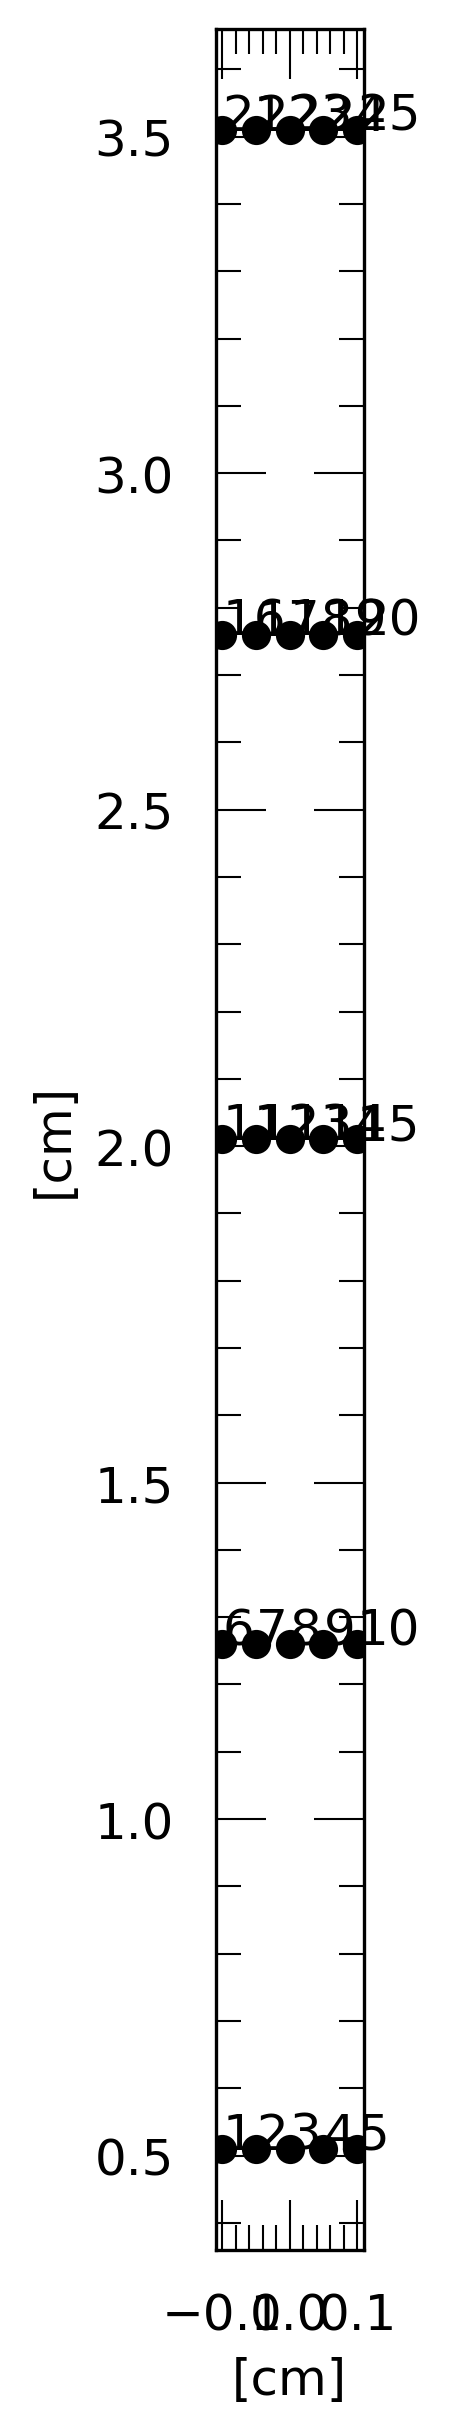

In [8]:
steps = 5
man = st.processing.Manager(
    functools.partial(st.worlds.build_rod_wedge_world, ANGLE),
    out_dir=f'rod_{ANGLE}deg_wedge/'
)
man.define_grid(
    vertical_range=zrange,
    horizontal_func=func,
    steps=steps,
    visualize=True
)

## Run

In [9]:
runs = man.run(200, seed=10, visualize=False)
# seed=100 produced geometry error of point not on surface...

not within
[[-0.13819146 -0.20002878  3.80690065]]


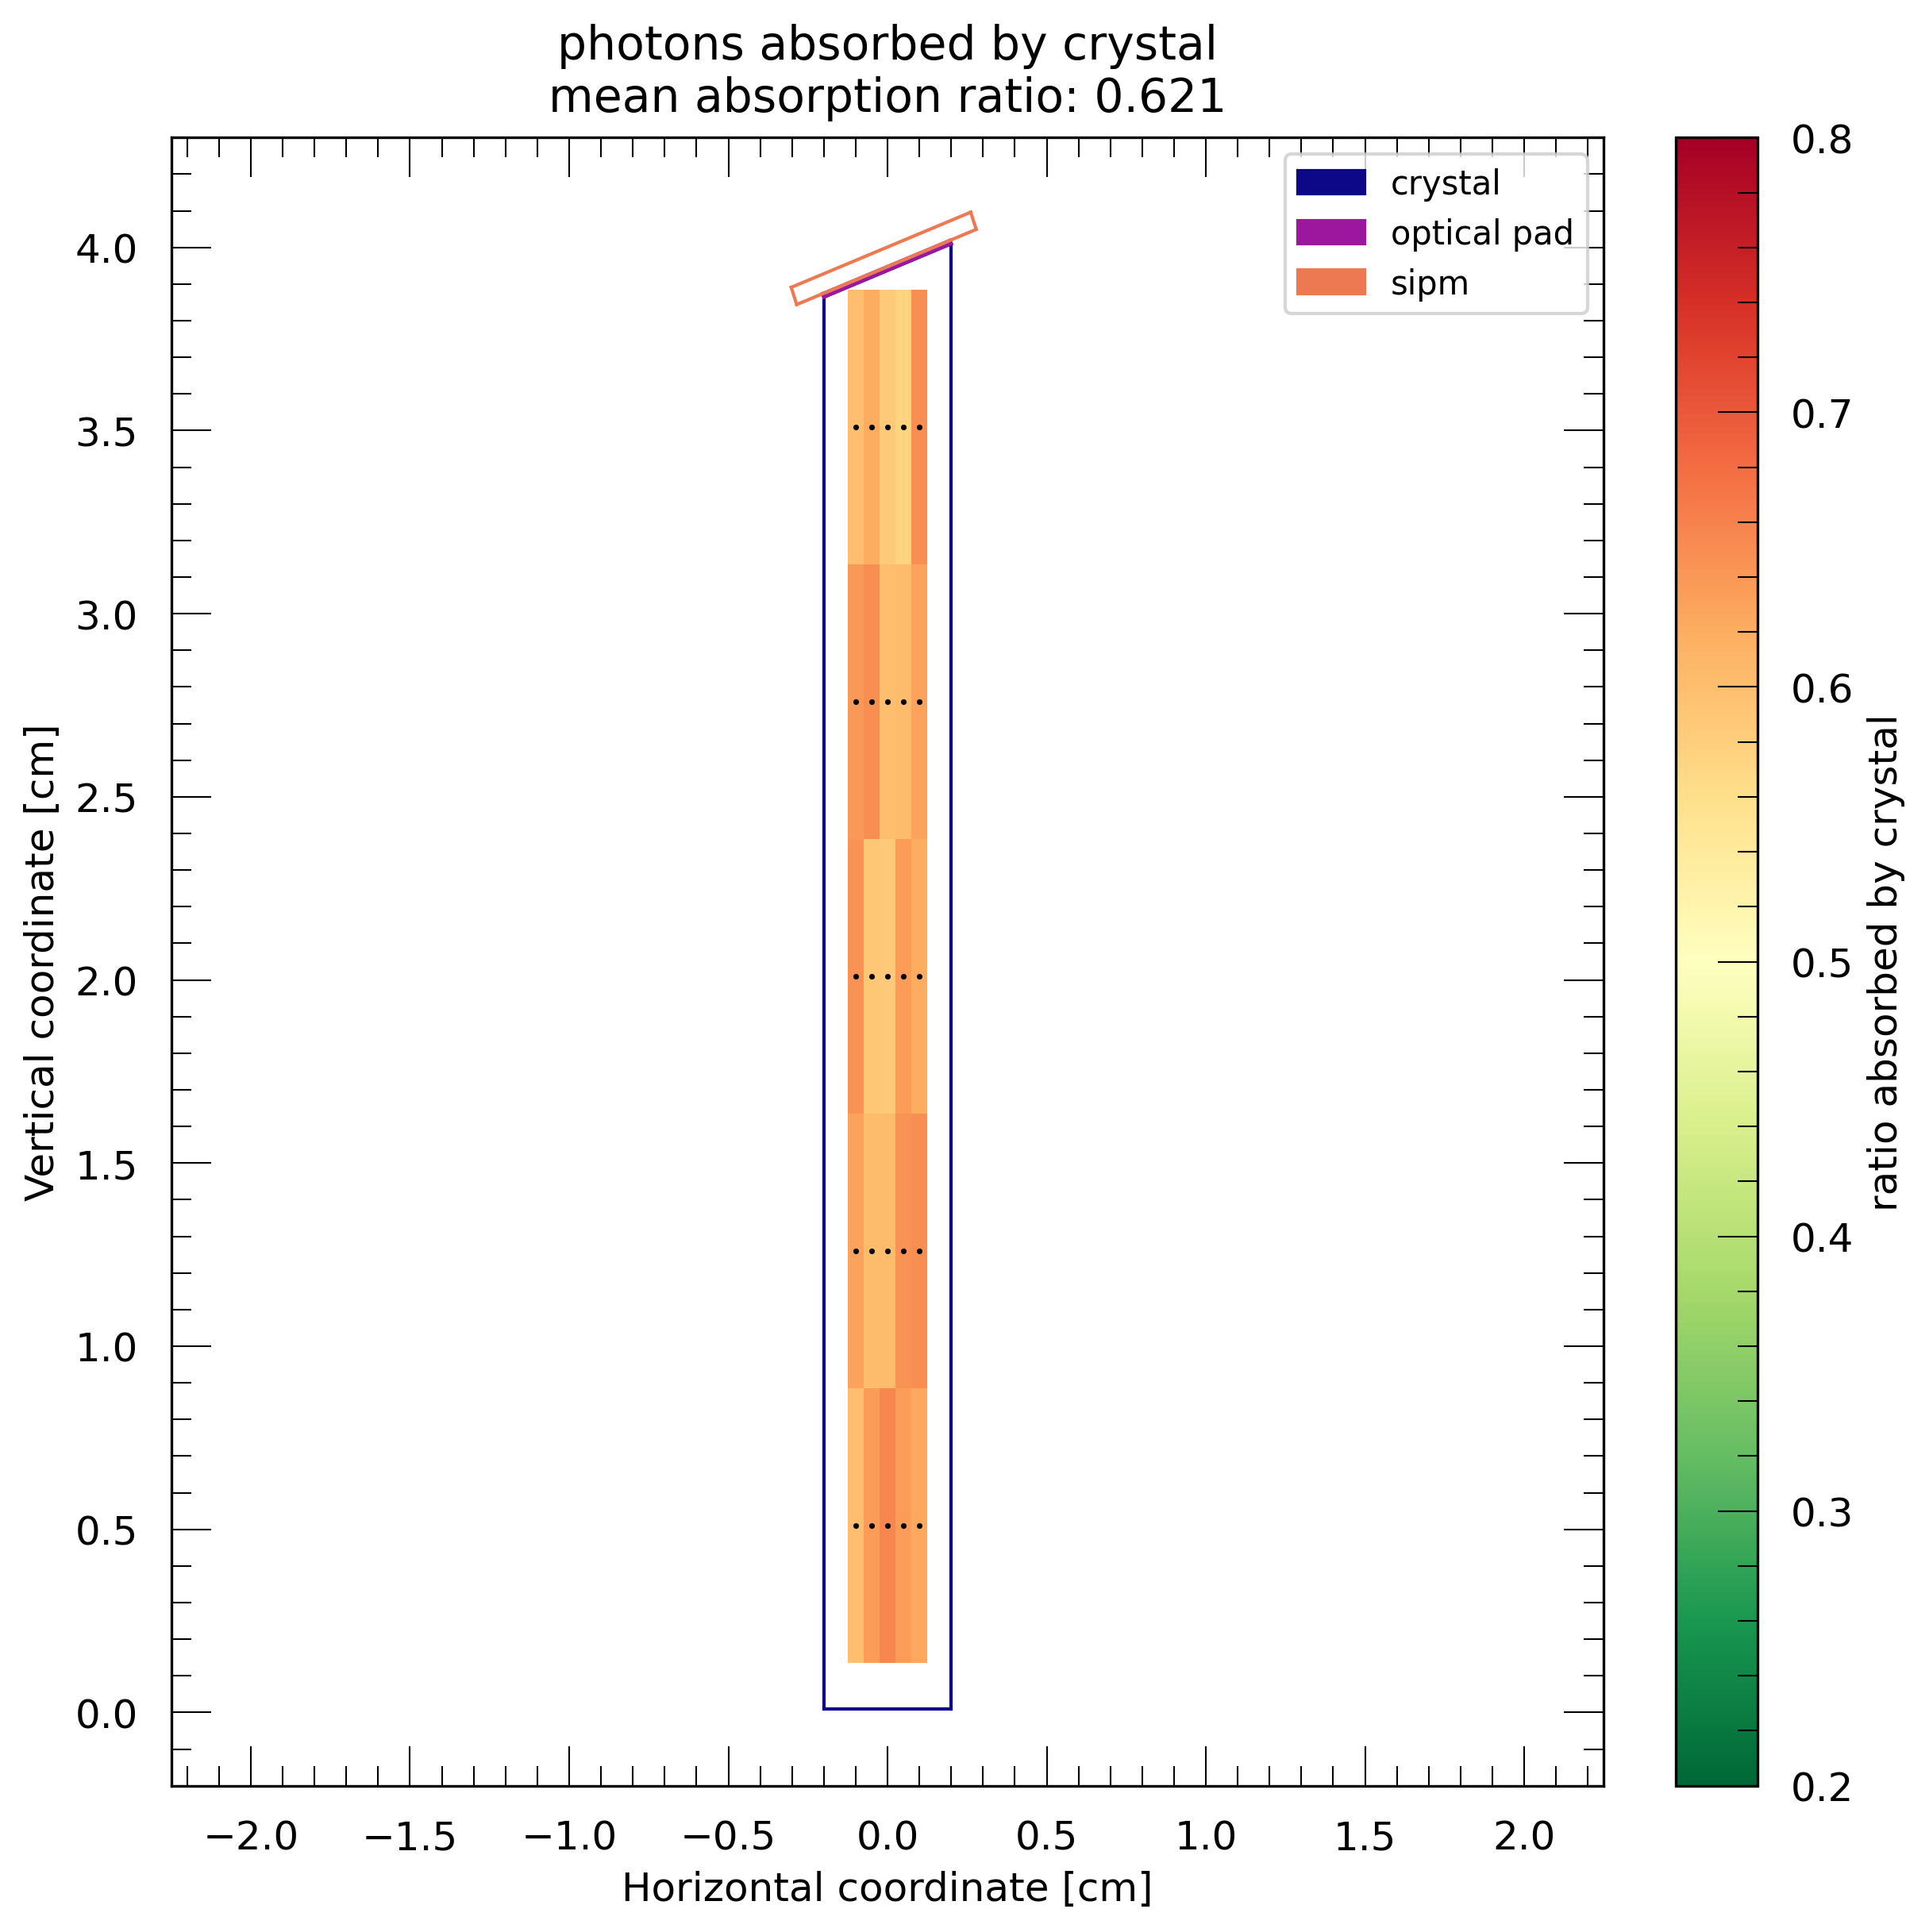

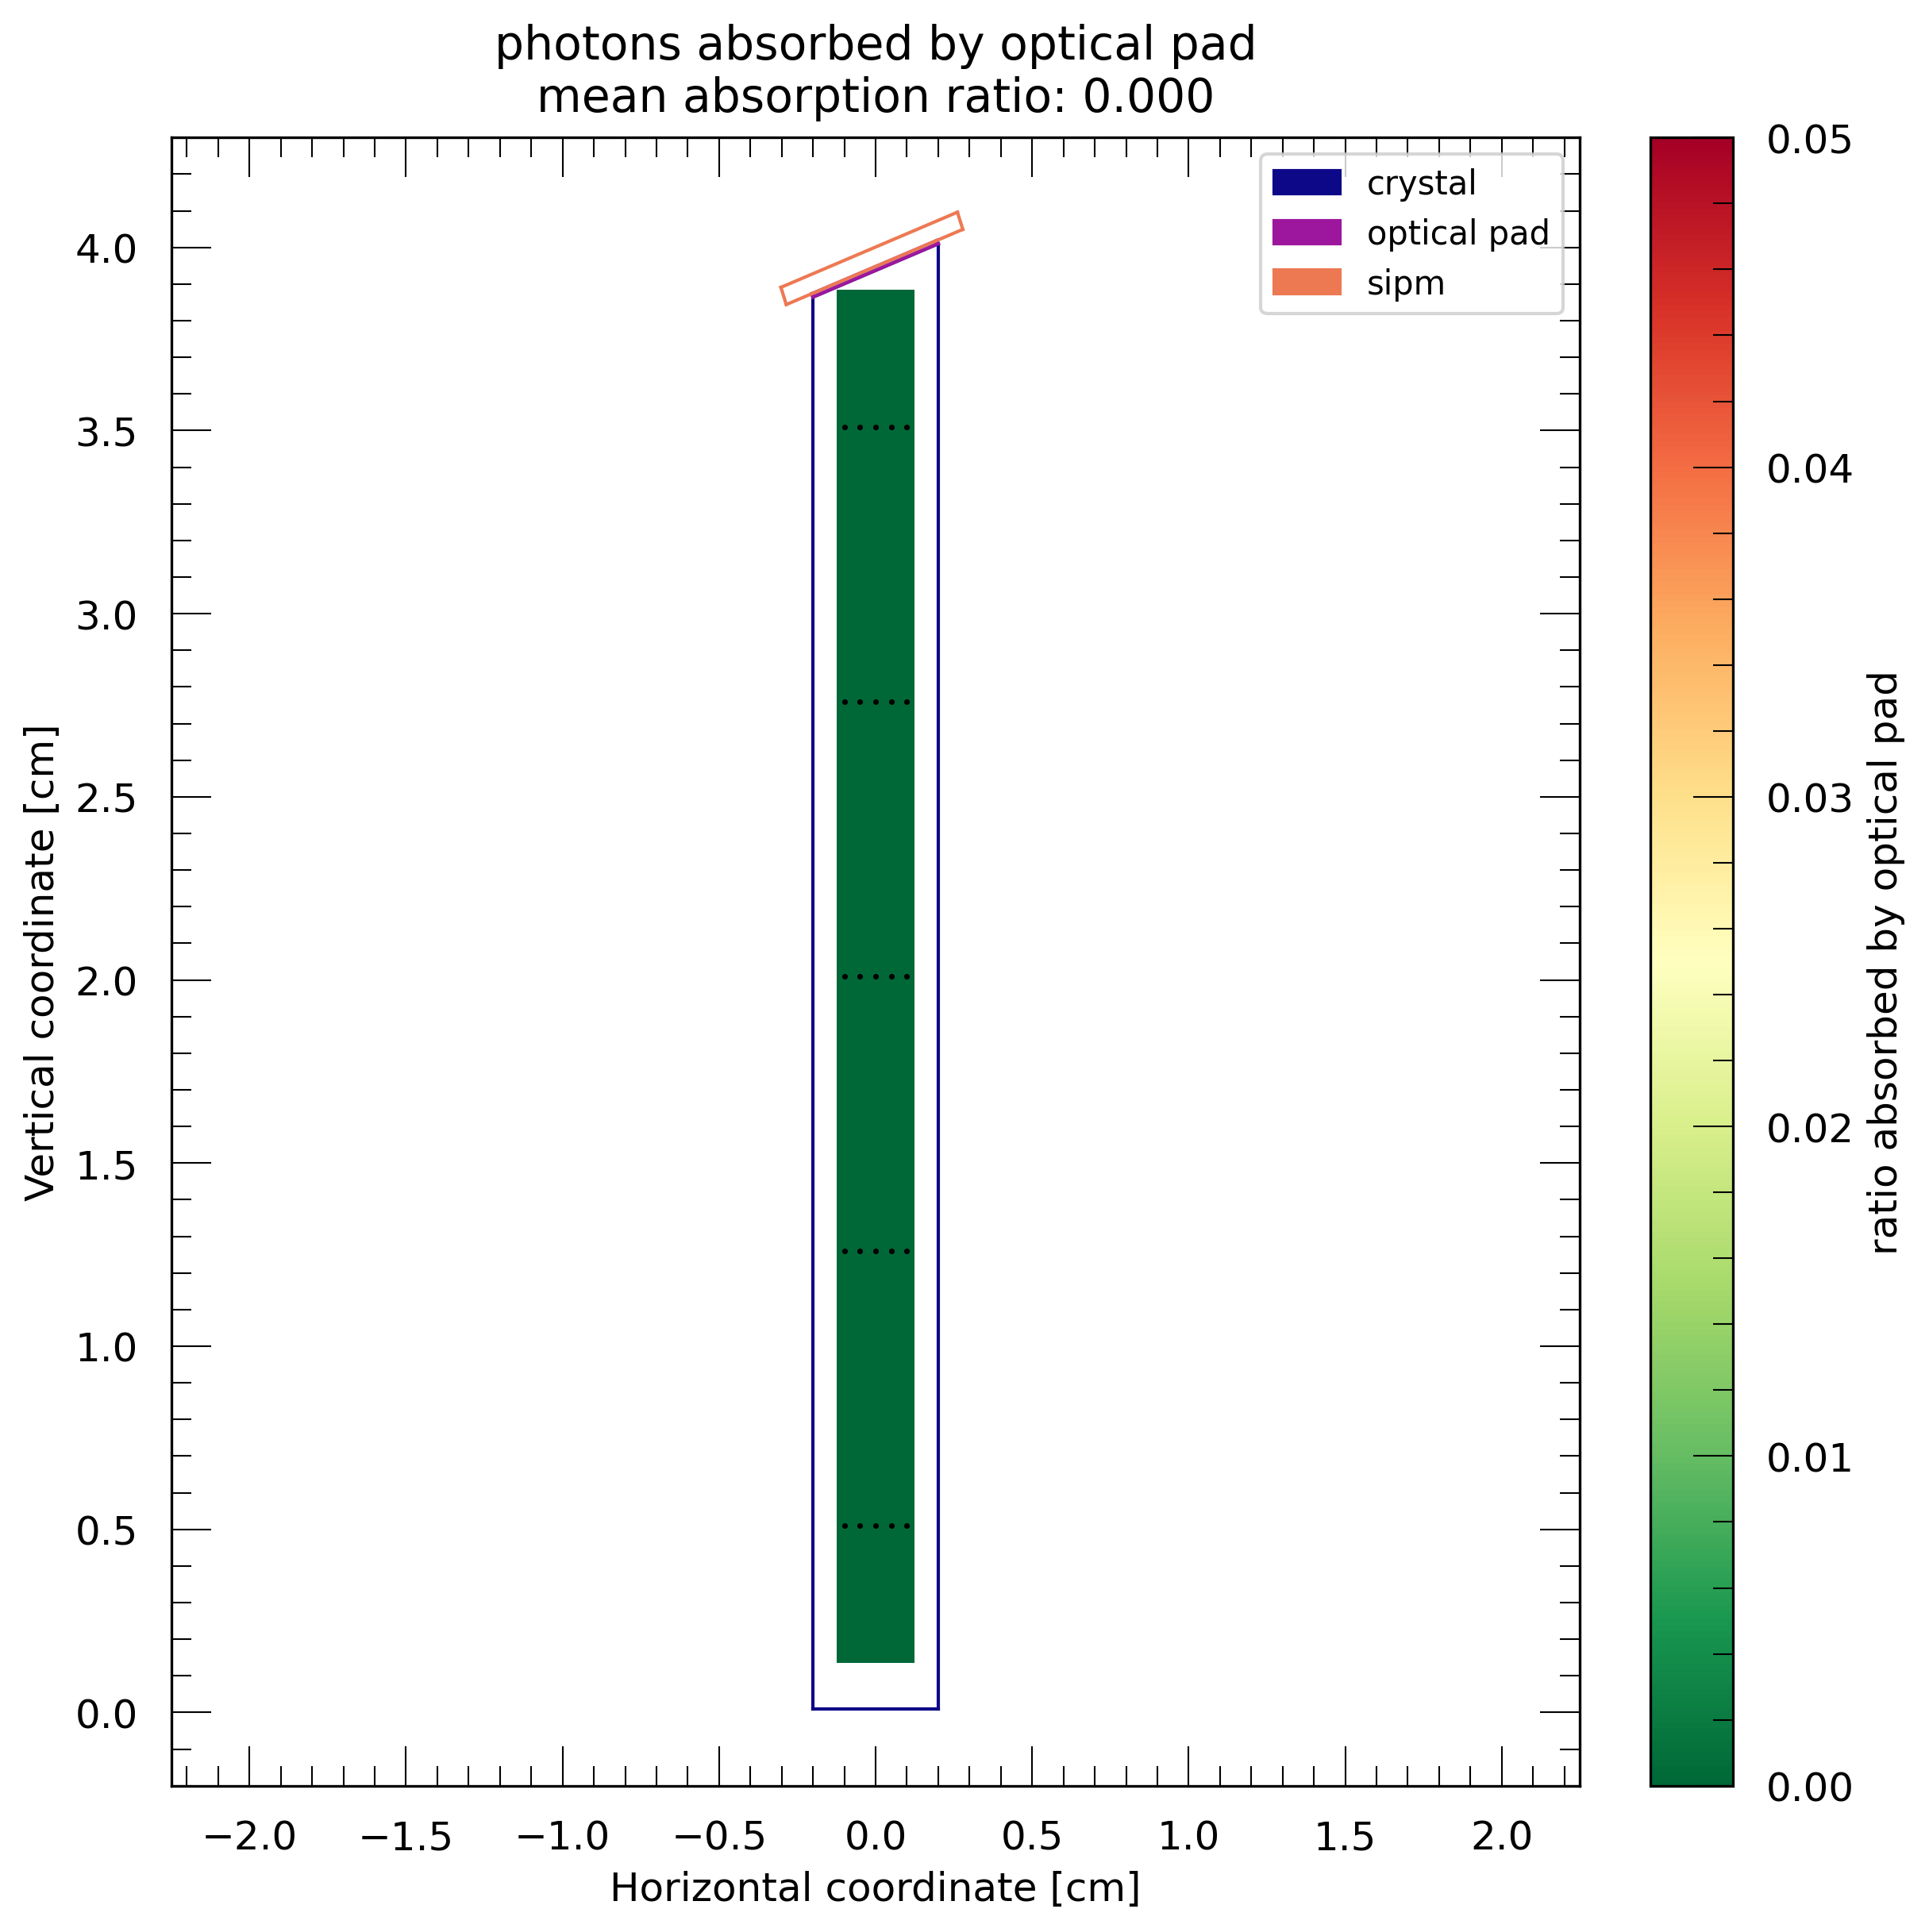

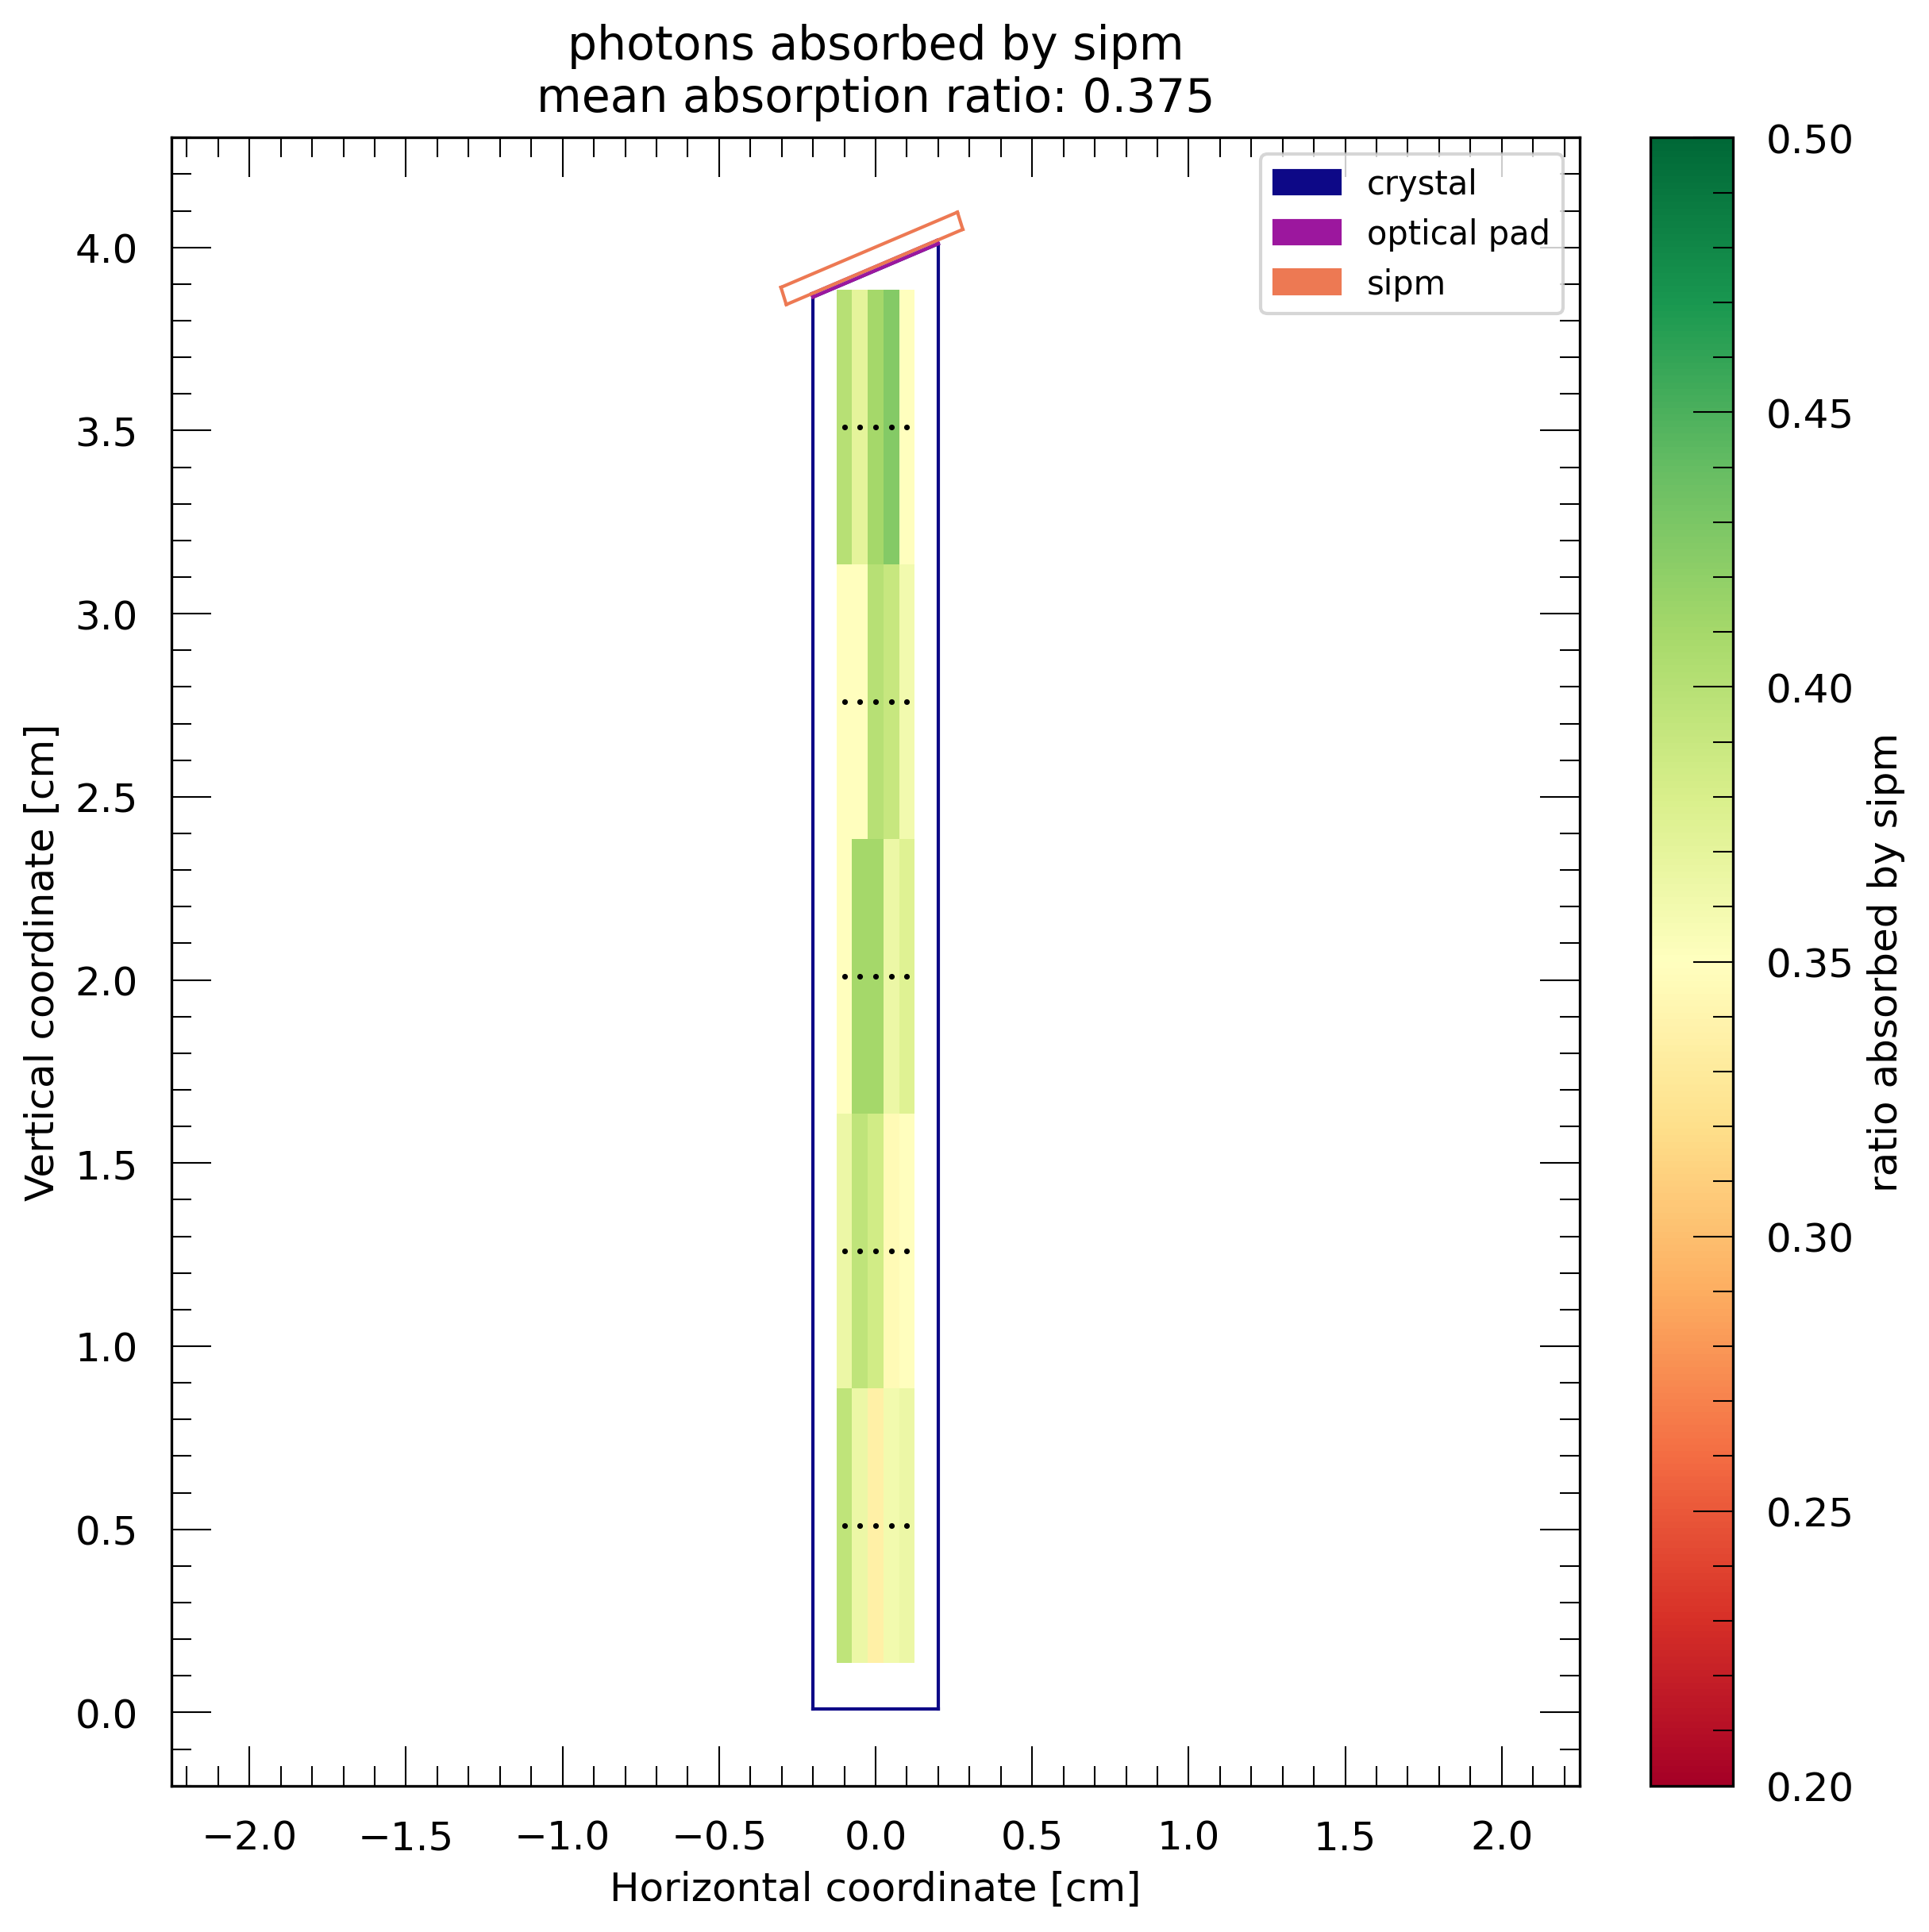

In [10]:
man.plot_all_ratios_absorbed()